# **Challenge of the Week - ML Workflow**

© 2024, Zaka AI, Inc. All Rights Reserved.

---

## Case Study: Classifying Smokers vs Non Smokers

**Objective:**

In this challenge, you will work on a dataset that you saw during week 1 but this time with different aspect. Your goal is not only to make a prediction, it is to make a prediction with the best possible way. So you will be building, evaluating, and improving your model.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

Our problem would be to predict if a person is smoker or not based on all the other features in the dataset.

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models. We need from it train_test_split and LogisticRegression Functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Changing the working directory
%cd /content/drive/MyDrive/Colab_Notebooks/ZAKA_AIC /Module3

/content/drive/MyDrive/Colab_Notebooks/ZAKA_AIC /Module3


#### Read & visualize data
To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function. Print the head of your dataset.

In [ ]:
#reading the csv file and printing the head
smoker_df = pd.read_csv('insurance.csv')
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

**Task:** how many rows & columns in our dataset

In [ ]:
# Getting the number of rows and columns
rows = smoker_df.shape[0]
columns = smoker_df.shape[1]
print("There are {} rows and {} columns".format(rows, columns))

There are 1338 rows and 7 columns


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [ ]:
# Using info()
smoker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [ ]:
# Using describe()
smoker_df.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Data Imbalance Checking

First, let's see how many smokers vs non-smokers we have.

In [ ]:
# Checking for imbalance in 'Smoker column'
smoker_df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


We have an imbalance that we will fix later.

Let's see how much each feature tells us about a person being  a smoker or not.
For each of your numerical features, plot the distribution for the smokers and the non smokers case.

In [ ]:
#Using the seaborn library to plot the distributions and seperating smokers from non smokers
import seaborn as sns

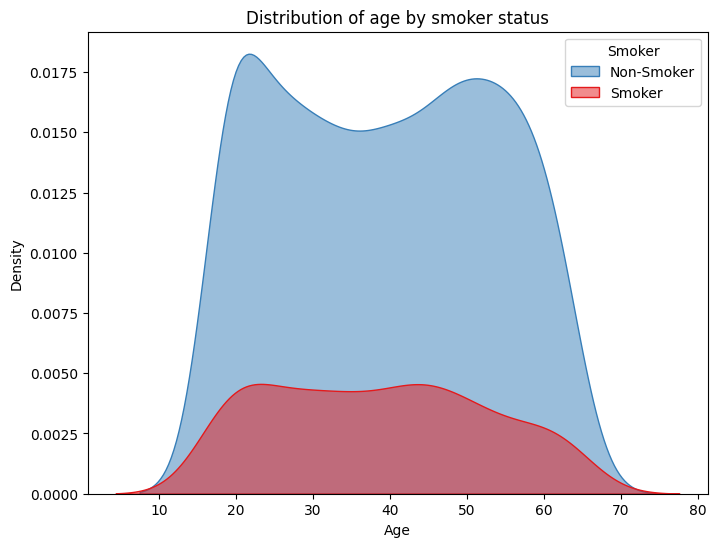

In [ ]:
# Plotting the distribution of age through KDE

plt.figure(figsize=(8, 6))
sns.kdeplot(data=smoker_df, x='age', hue='smoker', fill=True, alpha=0.5, palette="Set1")
plt.title('Distribution of age by smoker status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Smoker status', labels=['Non-Smoker', 'Smoker'])
plt.show()


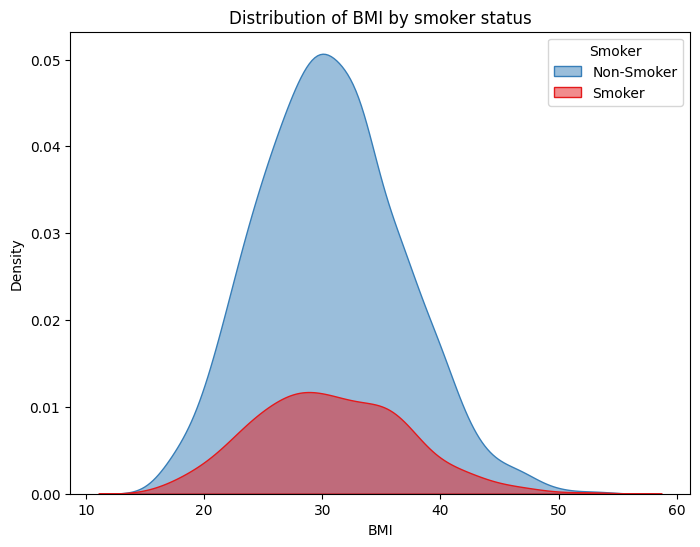

In [ ]:
# Plotting the distribution of bmi through KDE

plt.figure(figsize=(8, 6))
sns.kdeplot(data=smoker_df, x='bmi', hue='smoker', fill=True, alpha=0.5, palette="Set1")
plt.title('Distribution of BMI by smoker status')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()

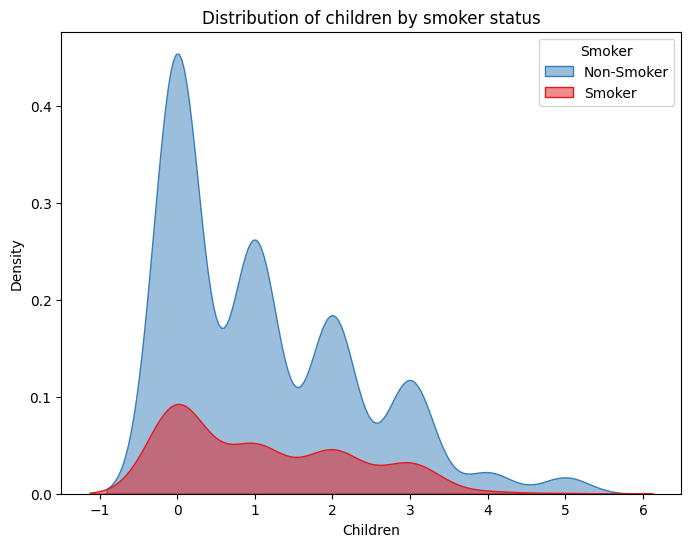

In [ ]:
# Plotting the distribution of children for both cases through KDE

plt.figure(figsize=(8, 6))
sns.kdeplot(data=smoker_df, x='children', hue='smoker', fill=True, alpha=0.5, palette="Set1")
plt.title('Distribution of children by smoker status')
plt.xlabel('Children')
plt.ylabel('Density')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()

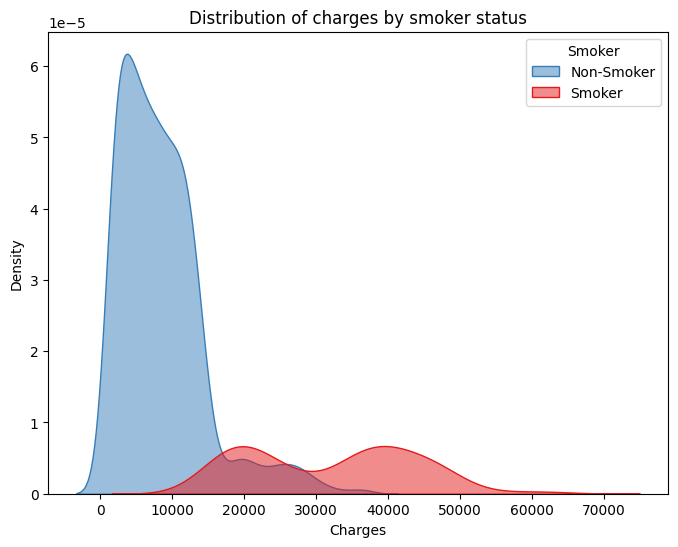

In [ ]:
# Plotting the distribution of children for both cases through KDE

plt.figure(figsize=(8, 6))
sns.kdeplot(data=smoker_df, x='charges', hue='smoker', fill=True, alpha=0.5, palette="Set1")
plt.title('Distribution of charges by smoker status')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()

WHat do you think is the feature that tells us the most about a person being smoker or not?

**Based on the desnsity graphs above, it is clear that 'charges' tells us the most about whether a person is a smoker or not. The KDE graphs for age, bmi and children imply that those feature will tell us the least as the smoker and non-smoker curve peaks align on the x-axis, whereas despite the overlap, the difference is very clear for charges.**

Now let's see if the gender influences being a smoker or not.
<br>Hint: You can use crosstabbing and then plot distributions

smoker        no       yes
sex                       
female  0.826284  0.173716
male    0.764793  0.235207


<Axes: xlabel='sex'>

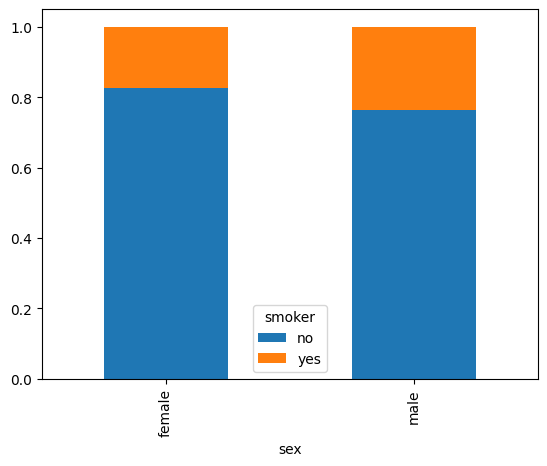

In [ ]:
# Checking if the column 'sex' infludences being a smoker or not
gender = pd.crosstab(smoker_df['sex'], smoker_df['smoker'], normalize='index')
print(gender)
gender.plot(kind='bar', stacked=True)

Do you think the gender has an effect on smoking according to your results?

**Based on the graph above, gender has no effect on smoking status. This is clear because the precentages in the 'no' and 'yes' columns are close to each other**

Do the same for the column 'region'

smoker           no       yes
region                       
northeast  0.793210  0.206790
northwest  0.821538  0.178462
southeast  0.750000  0.250000
southwest  0.821538  0.178462


<Axes: xlabel='region'>

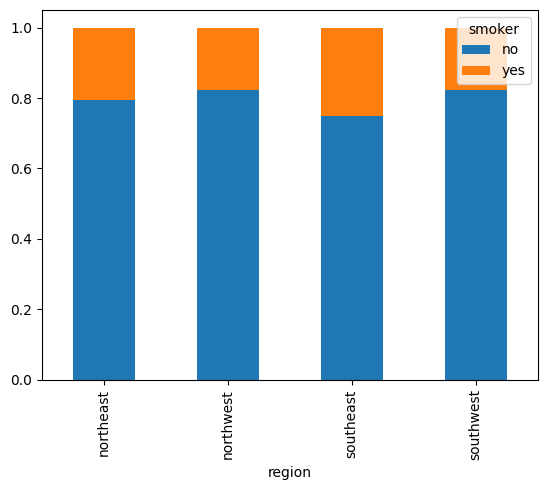

In [ ]:
# Checking if the column 'region' infludences being a smoker or not
Region = pd.crosstab(smoker_df['region'], smoker_df['smoker'], normalize='index')
print(Region)
Region.plot(kind='bar', stacked=True)

## 3. Data Preprocessing
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



 Let's start by seeing if we have missing data.

In [ ]:
# Checking for missing data
smoker_df.isnull().sum()

,0
age,0
sex,0
bmi,3
children,0
smoker,0
region,0
charges,0


Drop rows with missing values, and make sure you have no nulls anymore.

In [ ]:
#Dropping rows with missing values
smoker_df = smoker_df.dropna()

smoker_df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


See the type of each of your columns

In [ ]:
#Checking for the type of each column
smoker_df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [ ]:
#Encoding sex column
smoker_df['sex'] = smoker_df['sex'].map({'male': 0, 'female': 1})
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


And now the smokers column

In [ ]:
#Encoding smoker column
smoker_df['smoker'] = smoker_df['smoker'].map({'no': 0, 'yes': 1})
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


And now the Region Column

In [ ]:
#Encoding region column
smoker_df['region'] = smoker_df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


#### Normalization

Let's scale all the columns by dividing by the maximum

In [ ]:
#Test Your Zaka
data_max = smoker_df.max()
smoker_df = smoker_df.div(data_max)
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.296875,1.0,0.525127,0.0,1.0,0.000000,0.264777
1,0.281250,0.0,0.635611,0.2,0.0,0.333333,0.027059
2,0.437500,0.0,0.621118,0.6,0.0,0.333333,0.069773
3,0.515625,0.0,0.427348,0.0,0.0,0.666667,0.344744
4,0.500000,0.0,0.543572,0.0,0.0,0.666667,0.060637


In [ ]:
smoker_df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,0.612441,0.495131,0.577102,0.219476,0.205243,0.495381,0.208299
std,0.219491,0.500164,0.114832,0.241145,0.404031,0.368180,0.190041
min,0.281250,0.000000,0.300395,0.000000,0.000000,0.000000,0.017592
25%,0.421875,0.000000,0.495059,0.000000,0.000000,0.333333,0.074365
50%,0.609375,0.000000,0.572181,0.200000,0.000000,0.333333,0.147187
75%,0.796875,1.000000,0.652880,0.400000,0.000000,0.666667,0.262144
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Model Training & Testing



#### Data splits

Before training, we need to split data into training (80%) & testing (20%), and fix the random_state parameter to 42 <br>Print the shapes of your training and testing data.

In [ ]:
# Getting all columns except [smoker] for x
x = smoker_df.drop(columns=['smoker'])
# Setting [smoker] as y
y = smoker_df['smoker']

# Spliting dataset into a 80/20 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1068, 6) (1068,)
(267, 6) (267,)


#### Logistic Regression Modeling


Define the logistic Regression model, and fit it on the training data

In [ ]:
# Building the regression model and fitting it on the training data
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

#### Evaluation

Evaluate your model on the testing data, and compute: Accuracy, Precision, Recall and F1 score

In [ ]:
# Predicting on the testing data
prediction = model.predict(x_test)

#Computing Accuracy, Precision, Recall and F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

Accuracy:  0.898876404494382
Precision:  0.9523809523809523
Recall:  0.6153846153846154
F1 score:  0.7476635514018691


Which metrics you think can be improved?

**Recall and F1 score need to be improved, as well as accuracy.**

##5. Model Improvement

Now we will try to improve the model that we built.

####Handle data Imbalance

Plot a histogram that shows the numbers of smokers and non smokers

<Axes: xlabel='smoker'>

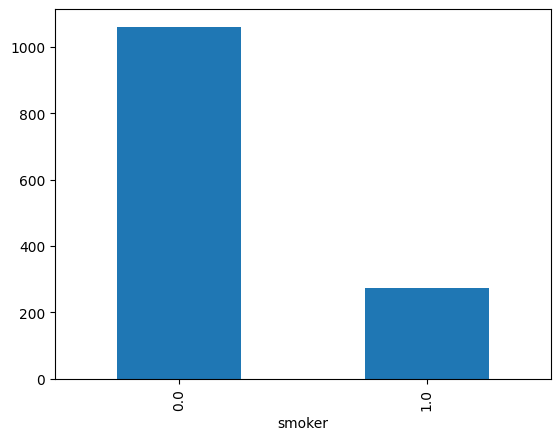

In [ ]:
#Plotting a histogram for smokers and non-smokers
smoker_df['smoker'].value_counts().plot(kind='bar')

We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:
* Oversampling the minority class with a factor of 0.5
* Undersampling the majority class to obtain the same number in the 2 classes
<br>
We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

In [ ]:
# Handling the imbalance in the dataset
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Getting all columns except [smoker] for x
x1 = smoker_df.drop(columns=['smoker'])
# Setting [smoker] as y
y1 = smoker_df['smoker']

# Step 1: Oversampling minority class by 0.5
oversample = RandomOverSampler(sampling_strategy=0.5)
x_oversampled, y_oversampled = oversample.fit_resample(x1,y1)

# Step 2: Undersampling majority class to match minority class
undersample = RandomUnderSampler(sampling_strategy='majority')
x_balanced, y_balanced = undersample.fit_resample(x_oversampled, y_oversampled)


Plot a new histogram on the new data we have.

<Axes: xlabel='smoker'>

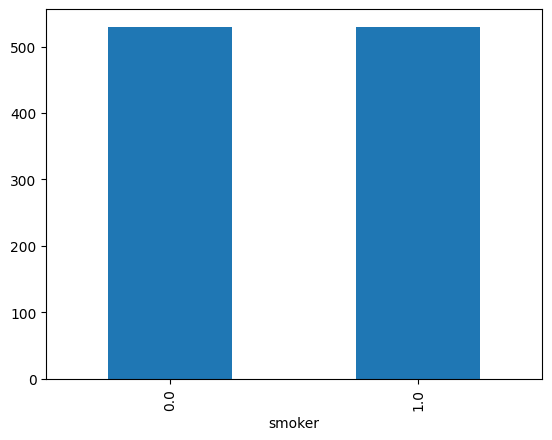

In [ ]:
#Plotting a histogram with balanced data
y_balanced.value_counts().plot(kind='bar')

Split the new data you obtained (80%, 20%), and build a Logistic Regression mode, and fit it on this data. Fix the random_state at 42

In [ ]:
# Spliting the new data
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)

model1 = LogisticRegression()
model1.fit(x_train1, y_train1)

LogisticRegression()

Asses your model on the testing data, and Compute the same metrics you computed before

In [ ]:
# Predicting on the testing data
prediction1 = model1.predict(x_test1)

#Computing Accuracy, Precision, Recall and F1 score
accuracy1 = accuracy_score(y_test1, prediction1)
precision1 = precision_score(y_test1, prediction1)
recall1 = recall_score(y_test1, prediction1)
f11 = f1_score(y_test1, prediction1)

print("Accuracy: ", accuracy1)
print("Precision: ", precision1)
print("Recall: ", recall1)
print("F1 score: ", f11)

Accuracy:  0.9764150943396226
Precision:  0.9519230769230769
Recall:  1.0
F1 score:  0.9753694581280788


We can see how much our scores got better when we balanced our dataset.

####Regularization with Hyperparameter Tuning

We will be tuning the hyperparameter C in the logistic regression model that we used. This hyperparameter represents regularization.
<br><img src="https://equatio-api.texthelp.com/svg/C%5C%20%3D%5C%20%5Cfrac%7B1%7D%7B%5Clambda%7D" alt="C equals 1 over lamda">

The possible values of C will be: [0.1, 1, 10, 100, 1000]

We will also know have to decide what type of regularization we will use: L1, or L2.

Since we have several parameters to tune, we will be doing what we call a GridSearch, to search for the best model having the best pair of hyperparameters.
We will be doing a 5 folds cross validation

Note: Specify the solver='liblinear' in your LogisticRegression model, and this is because other solvers do not support L1 regularization.

In [ ]:
from sklearn.model_selection import GridSearchCV

model2 = LogisticRegression(max_iter=1000, solver='liblinear')

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train1, y_train1)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

Print the best score and the best parameters

In [ ]:
# Printing best score and best parameters
best_score = grid_search.best_score_
best_params = grid_search.best_params_

print("Best accuracy score:", best_score)
print("Best Parameters:", best_params)

Best accuracy score: 0.9834946049425687
Best Parameters: {'C': 100, 'penalty': 'l1'}


Let's assess the model's performance in general for the best specified hyperparameters using the same metrics we used earlier.

In [ ]:
# Assessing model performance with C = 100 and penalty = l1
model3 = LogisticRegression(C=100, penalty='l1', solver='liblinear', max_iter=1000)
model3.fit(x_train1, y_train1)

prediction2 = model3.predict(x_test1)

accuracy2 = accuracy_score(y_test1, prediction2)
precision2 = precision_score(y_test1, prediction2)
recall2 = recall_score(y_test1, prediction2)
f12 = f1_score(y_test1, prediction2)

print("Accuracy: ", accuracy2)
print("Precision: ", precision2)
print("Recall: ", recall2)
print("F1 score: ", f12)

Accuracy:  0.9905660377358491
Precision:  0.9801980198019802
Recall:  1.0
F1 score:  0.99


We can see that the results improved compared to the last model we built.

####AdaBoost Classifier

Now, we will work on improving our model, but this time through using ensemble methods, and what we will use for today is Adaboost.

AdaBoost is a boosting ensemble method that relies on the boosting concepts that we learned about during the week.
In Adaboost, each model is learning to correct the previous model's mistakes (misclassified examples). After that, each model will have a weight that depends on how well it performed on the training data. And after that, different results are aggregated based on weighted averaging.

Create an AdaBoostClassifier Model from sklearn library with n_estimators=10, and fit it on the training data you have.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Creating the AdaBoostClassifier with n_estimator = 10
model4 = AdaBoostClassifier(n_estimators=10)
model4.fit(x_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=10)

Asses the performance of your model on the testing data, and compute the same metrics we computed earlier.

In [ ]:
# Assessing model performance
prediction3 = model4.predict(x_test1)

accuracy3 = accuracy_score(y_test1, prediction3)
precision3 = precision_score(y_test1, prediction3)
recall3 = recall_score(y_test1, prediction3)
f13 = f1_score(y_test1, prediction3)

print("Accuracy: ", accuracy3)
print("Precision: ", precision3)
print("Recall: ", recall3)
print("F1 score: ", f13)

Accuracy:  0.9905660377358491
Precision:  0.9801980198019802
Recall:  1.0
F1 score:  0.99


**BONUS:** One thing you can try on your own, is to tune the Hyperparameters of the Adaboost algorithm, and build an even more powerful model :)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model5 = AdaBoostClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],    # Number of weak learners
    'learning_rate': [0.01, 0.1, 0.5, 1],  # Learning rate
    'estimator': [                         # Weak learners with varying depths
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3)
    ]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model5, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train1, y_train1)

# Best parameters and score
best_score1 = grid_search.best_score_
best_params1 = grid_search.best_params_

print("Best Score:", best_score1)
print("Best Parameters:", best_params1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best Score: 0.9811416637660981
Best Parameters: {'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 1, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
# Training the best AdaBoost model
model6 = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), learning_rate = 1, n_estimators = 50)
model6.fit(x_train1, y_train1)

# Evaluating performance on test set
y_pred = model6.predict(x_test1)

# Checking performance metrics
accuracy4 = accuracy_score(y_test1, y_pred)
precision4 = precision_score(y_test1, y_pred)
recall4 = recall_score(y_test1, y_pred)
f14 = f1_score(y_test1, y_pred)

print("Accuracy: ", accuracy4)
print("Precision: ", precision4)
print("Recall: ", recall4)
print("F1 score: ", f14)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy:  0.9905660377358491
Precision:  0.98989898989899
Recall:  0.98989898989899
F1 score:  0.98989898989899
